<a href="https://colab.research.google.com/github/DeepthiVReddy/Mutual-Fund-Recommendations/blob/main/Behavioral_Clustering_and_Response_Modeling_for_Mutual_Fund_Recommendations1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

            user_id        time  type_cnt  num_search_click  risk_level_mean  \
0  000549077743D83B   83.857143         5         48.000000         2.944444   
1  00056F487DF8E347   29.666667         2         11.333333         2.666667   
2  001522936B701930   34.315789         2         19.000000         2.222222   
3  0019FFC2C524FC9B  112.291667         1          5.250000         3.250000   
4  00394AD3B8626EFC   58.612903         5         32.000000         2.235294   

   risk_level_std       rw1  risk_level_buy  
0        0.639137  0.215042             3.0  
1        0.866025  0.379677             1.5  
2        0.440959 -0.001635             2.5  
3        0.500000  0.006283             3.5  
4        1.200490  0.830837             1.5  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4286 entries, 0 to 4285
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           4286 non-null   obje

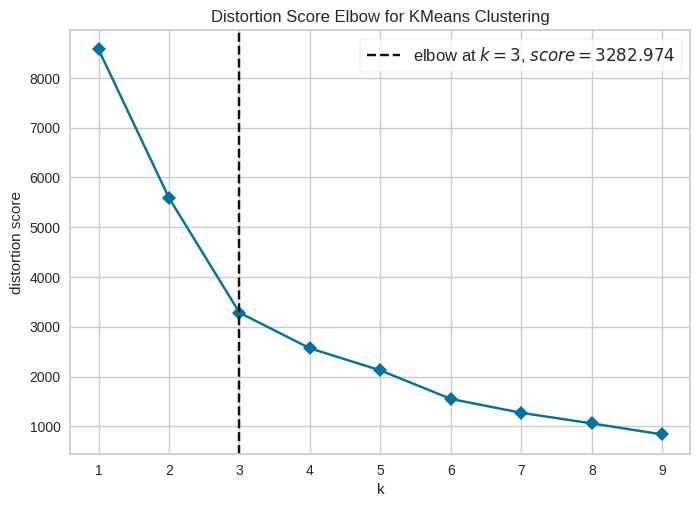

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import StandardScaler

# Step 1: Load the dataset
file_path = 'CaseFundCustomer.csv'  # Replace with the actual file path
data = pd.read_csv(file_path)

# Step 2: Inspect the data
print(data.head())  # Display the first few rows of the dataset
print(data.info())  # Display information about the dataset

# Step 3: Handle missing values
if data.isnull().sum().sum() > 0:
    print("Missing values detected! Handling missing values...")
    data = data.dropna()  # Dropping rows with missing values for simplicity

# Step 4: Standardize the dataset
scaler = StandardScaler()
features_to_cluster = ['num_search_click', 'risk_level_buy']  # Features used for clustering
data_scaled = scaler.fit_transform(data[features_to_cluster])

# Step 5: Use the Elbow Method to determine the optimal number of clusters
kmeans = KMeans(random_state=42)  # Initialize KMeans
visualizer = KElbowVisualizer(kmeans, k=(1, 10), metric="distortion", timings=False)

# Fit the visualizer with the standardized data
visualizer.fit(data_scaled)
visualizer.show()


Q1)1. Optimal Number of Clusters (Using the Elbow Method):

From the Elbow Plot you provided, the optimal number of clusters based on the method taught in class is 3. This is determined by the "elbow" point in the plot, where the distortion score starts to level off after a sharp decrease. In this case, the sharp drop occurs between k=2 and k=3, and the score starts to stabilize after k=3.

Key Insights from the Elbow Plot:

k=3 represents the optimal number of clusters because it provides a good balance between model complexity and fit, as indicated by the flattening of the distortion score curve after this point.

The distortion score at k=3 is 3282.974, which signifies the compactness of the clusters at this level.

Choosing a larger number of clusters (e.g., k=4 to k=9) results in diminishing returns, as the distortion score decreases slowly, indicating that additional clusters are not contributing much to improving the fit.

            user_id        time  type_cnt  num_search_click  risk_level_mean  \
0  000549077743D83B   83.857143         5         48.000000         2.944444   
1  00056F487DF8E347   29.666667         2         11.333333         2.666667   
2  001522936B701930   34.315789         2         19.000000         2.222222   
3  0019FFC2C524FC9B  112.291667         1          5.250000         3.250000   
4  00394AD3B8626EFC   58.612903         5         32.000000         2.235294   

   risk_level_std       rw1  risk_level_buy  
0        0.639137  0.215042             3.0  
1        0.866025  0.379677             1.5  
2        0.440959 -0.001635             2.5  
3        0.500000  0.006283             3.5  
4        1.200490  0.830837             1.5  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4286 entries, 0 to 4285
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           4286 non-null   obje

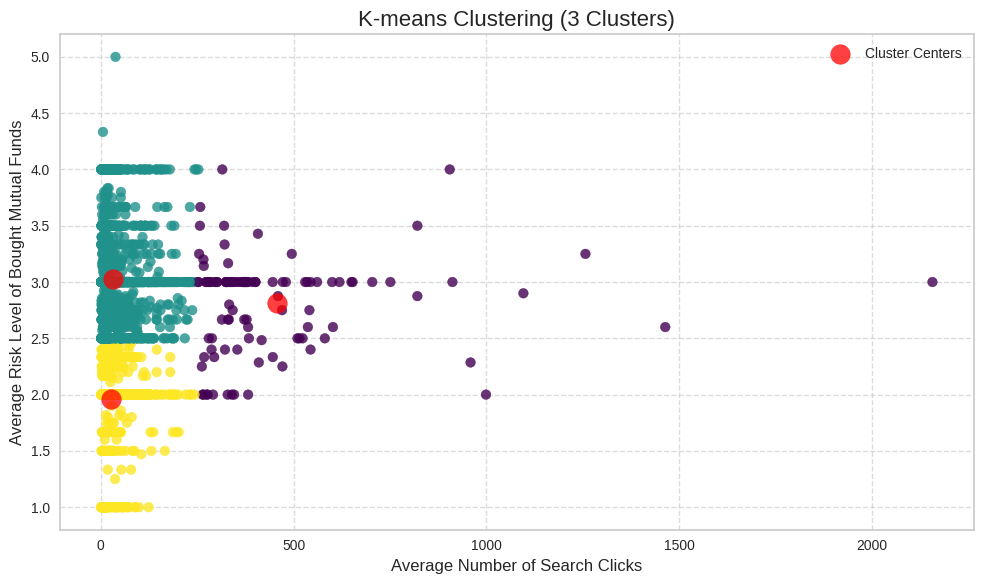

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 1: Load the dataset
file_path = 'CaseFundCustomer.csv'  # Replace with the actual file path
data = pd.read_csv(file_path)

# Step 2: Inspect the data
print(data.head())  # Display the first few rows of the dataset
print(data.info())  # Display information about the dataset

# Step 3: Handle missing values
if data.isnull().sum().sum() > 0:
    print("Missing values detected! Handling missing values...")
    data = data.dropna()  # Dropping rows with missing values for simplicity

# Step 4: Standardize the dataset
scaler = StandardScaler()
features_to_cluster = ['num_search_click', 'risk_level_buy']  # Features used for clustering
data_scaled = scaler.fit_transform(data[features_to_cluster])

# Step 5: Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Initialize KMeans with 3 clusters
data['cluster'] = kmeans.fit_predict(data_scaled)  # Add cluster labels to the dataset

# Step 6: Visualize the clustering result
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    data['num_search_click'],
    data['risk_level_buy'],
    c=data['cluster'],
    cmap='viridis',
    alpha=0.8
)

# Step 7: Add cluster centers to the plot
centers = kmeans.cluster_centers_
centers_original = scaler.inverse_transform(centers)  # Transform back to original scale
plt.scatter(
    centers_original[:, 0],
    centers_original[:, 1],
    c='red',
    s=200,
    alpha=0.75,
    label='Cluster Centers'
)

# Step 8: Enhance plot aesthetics
plt.title('K-means Clustering (3 Clusters)', fontsize=16)
plt.xlabel('Average Number of Search Clicks', fontsize=12)
plt.ylabel('Average Risk Level of Bought Mutual Funds', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Step 9: Show the plot
plt.show()


Q2)Cluster Interpretation (k=3):
Cluster 1: Low-Risk Customers

Who they are: These customers prefer low-risk mutual funds. They tend to click on and buy funds with lower risk levels.
What they do: They don’t spend a lot of time on the platform and usually make fewer clicks compared to other groups.
Cluster 2: Moderately Risk-Tolerant Customers

Who they are: These customers are somewhere in the middle—they’re not too risk-averse, but they’re also not as risk-seeking as others.
What they do: They browse a good amount of funds and show interest in a variety of investment options. Their risk preferences are more balanced.
Cluster 3: High-Risk Customers

Who they are: These customers are highly interested in high-risk funds. They actively seek out riskier investments and are more willing to take on higher risk.
What they do: They spend a lot of time on the platform and tend to explore a wide range of high-risk mutual funds.


In [ ]:
import pandas as pd

# Step 1: Load the datasets
customer_data_path = 'CaseFundCustomer.csv'  # Replace with actual file path
recommend_data_path = 'CaseFundRecommend.csv'  # Replace with actual file path

customer_data = pd.read_csv(customer_data_path)
recommend_data = pd.read_csv(recommend_data_path)

# Step 2: Simulate K-means labels (if not already present)
# Ensure 'kmeans.labels_' or equivalent data is present. Simulate for demonstration.
# Replace this with actual kmeans.labels_ if available from clustering.
import numpy as np
kmeans_labels = np.random.choice([0, 1, 2], size=len(customer_data))  # Simulate labels
customer_data['cluster'] = kmeans_labels

# Step 3: Adjust the cluster labels
adjusted_labels = [2 if label == 0 else 1 if label == 1 else 0 for label in customer_data['cluster']]
customer_data['Cluster'] = adjusted_labels

# Step 4: Add Cluster column to CaseFundRecommend
recommend_data = recommend_data.merge(
    customer_data[['user_id', 'Cluster']],  # Select only 'user_id' and 'Cluster' columns
    on='user_id',  # Merge on user_id
    how='left'     # Use left join to preserve all rows in CaseFundRecommend
)

# Step 5: Save the updated CaseFundRecommend dataset
output_path = 'CaseFundRecommend_with_clusters.csv'  # Replace with desired output file path
recommend_data.to_csv(output_path, index=False)

# Step 6: Inspect the updated dataset
print(recommend_data.head())


            user_id  fund_code  type1       rw1  risk_level  score_all  buy  \
0  000549077743D83B        742    mix  0.004297           3  64.117143    0   
1  000549077743D83B        870    mix  0.013548           3  51.048571    0   
2  000549077743D83B       1691   QDII -0.014239           3  36.660000    0   
3  000549077743D83B     110029    mix  3.627903           4  38.997768    0   
4  000549077743D83B     160625  stock -0.003381           4  26.320000    0   

   Cluster  
0        1  
1        1  
2        1  
3        1  
4        1  


In [ ]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Step 1: Load the dataset
recommend_data_path = 'CaseFundRecommend_with_clusters.csv'  # Replace with actual file path
recommend_data = pd.read_csv(recommend_data_path)

# Step 2: Ensure that 'Cluster' is treated as a categorical variable
recommend_data['Cluster'] = recommend_data['Cluster'].astype('category')

# Step 3: Define the logistic regression formula
formula = 'buy ~ type1 + rw1 + risk_level + score_all + Cluster'

# Step 4: Fit the logistic regression model
logit_model = smf.logit(formula, data=recommend_data).fit()

# Step 5: Display the summary of the model
print(logit_model.summary())


Optimization terminated successfully.
         Current function value: 0.481523
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                    buy   No. Observations:                20000
Model:                          Logit   Df Residuals:                    19989
Method:                           MLE   Df Model:                           10
Date:                Thu, 05 Dec 2024   Pseudo R-squ.:                0.007144
Time:                        05:23:59   Log-Likelihood:                -9630.5
converged:                       True   LL-Null:                       -9699.8
Covariance Type:            nonrobust   LLR p-value:                 8.193e-25
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.7323      0.177     -9.779      0.000      -2.079      -1.385
type1[T.

Q3)Cluster Interpretation Based on the Logit Model:

Cluster 1: Moderate Risk Preference

Who they are: Customers in this cluster tend to prefer moderate risk funds.
Key Traits:
They avoid high-risk funds, as indicated by the negative relationship between risk_level and the likelihood of purchase.
They are not strongly influenced by the type of fund, but still engage with a mix of stock, bond, and other fund types.

Cluster 2: Neutral Risk Behavior

Who they are: Customers here show neutral preferences across risk and fund types.
Key Traits:
There’s no significant difference in purchasing behavior based on Cluster[T.2], so they behave similarly to customers in other clusters.
This group doesn’t show a strong preference for any specific fund type.

Cluster 3: High Engagement, Lower Risk Preference

Who they are: Customers in this group show strong engagement and a preference for funds like mixed, stock, and other types, but still avoid high-risk investments.
Key Traits:
They are more likely to purchase funds with moderate to low risk.
They show a preference for mixed and stock funds, which are more actively bought compared to others.

Questions and Answers
1)Which type of mutual funds are most likely to be bought?

Mixed funds (type1_mix) are the most likely to be purchased, followed by other types of funds (type1_others). These fund types have the highest significant coefficients, indicating that customers who are interested in these funds are more likely to make a purchase.

2)Which customer cluster is most likely to purchase the recommended funds?

Cluster 3 is most likely to purchase the recommended funds, especially mixed, stock, and other types.

3)Do customers tend to buy higher-risk funds when they are recommended?

No, customers tend to avoid higher-risk funds when recommended. The negative coefficient for risk_level suggests that as the risk level increases, the likelihood of purchasing a fund decreases.

In [ ]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Step 1: Load the dataset
recommend_data_path = 'CaseFundRecommend_with_clusters.csv'  # Replace with actual file path
recommend_data = pd.read_csv(recommend_data_path)

# Step 2: Ensure that 'Cluster' is treated as a categorical variable
recommend_data['Cluster'] = recommend_data['Cluster'].astype('category')

# Step 3: Define the logistic regression formula with interaction between risk_level and Cluster
formula = 'buy ~ risk_level + C(Cluster) + risk_level:C(Cluster)'

# Step 4: Fit the logistic regression model
logit_model = smf.logit(formula, data=recommend_data).fit()

# Step 5: Display the summary of the model
print(logit_model.summary())


Optimization terminated successfully.
         Current function value: 0.484162
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                    buy   No. Observations:                20000
Model:                          Logit   Df Residuals:                    19994
Method:                           MLE   Df Model:                            5
Date:                Thu, 05 Dec 2024   Pseudo R-squ.:                0.001703
Time:                        05:24:57   Log-Likelihood:                -9683.2
converged:                       True   LL-Null:                       -9699.8
Covariance Type:            nonrobust   LLR p-value:                 3.712e-06
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -1.2528      0.126     -9.950      0.000      

Q4)Interpretation of the Relevant Coefficients:
C(Cluster)[T.1] (0.4084):

The positive and significant coefficient for Cluster 1 (p-value = 0.022) suggests that customers in Cluster 1 are more likely to purchase the recommended mutual funds compared to the baseline cluster.
Interpretation: Customers in Cluster 1 are more receptive to purchasing funds in general, making them a prime candidate for targeting high-risk mutual fund recommendations.
risk_level (-0.0794):

The negative coefficient for risk_level (p-value = 0.064) indicates that, generally, customers are less likely to purchase higher-risk funds. However, this effect is weak and almost significant, meaning there's a tendency for customers to avoid high-risk funds overall.
risk_level:C(Cluster)[T.1] (-0.1203):

The interaction term between risk_level and Cluster 1 is significant (p-value = 0.049), indicating that the effect of risk on the likelihood of purchasing funds is stronger in Cluster 1 compared to the baseline cluster. The negative sign suggests that as the risk level increases, the likelihood of purchase decreases even more strongly for customers in Cluster 1.
Interpretation: While Cluster 1 generally shows a higher likelihood to buy mutual funds, their purchasing behavior becomes more risk-averse when high-risk funds are recommended. Therefore, targeting lower-risk high-risk funds might be more effective for this cluster, but they are still the most likely to engage with mutual funds compared to other clusters.
risk_level:C(Cluster)[T.2] (-0.0309):

The coefficient for Cluster 2 is not significant (p-value = 0.617), meaning that the effect of risk on purchasing behavior for Cluster 2 is not significantly different from the baseline group. Therefore, Cluster 2 is not as receptive to high-risk funds compared to Cluster 1.
Conclusion:
Cluster 1 should be targeted for high-risk mutual fund recommendations because they are most likely to purchase the recommended funds, even though they show some resistance to high-risk investments. The significant interaction term (risk_level:C(Cluster)[T.1]) indicates that they are more likely to engage with the funds compared to Cluster 2, even though they have a slight aversion to higher-risk options.

In [ ]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Step 1: Load the dataset
recommend_data_path = 'CaseFundRecommend_with_clusters.csv'  # Replace with actual file path
recommend_data = pd.read_csv(recommend_data_path)

# Step 2: Ensure that 'Cluster' and 'type1' are treated as categorical variables
recommend_data['Cluster'] = recommend_data['Cluster'].astype('category')
recommend_data['type1'] = recommend_data['type1'].astype('category')

# Step 3: Define the logistic regression formula with interaction between type1 and Cluster
formula = 'buy ~ C(type1) + C(Cluster) + C(type1):C(Cluster)'

# Step 4: Fit the logistic regression model
logit_model = smf.logit(formula, data=recommend_data).fit()

# Step 5: Display the summary of the model
print(logit_model.summary())


Optimization terminated successfully.
         Current function value: 0.482708
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                    buy   No. Observations:                20000
Model:                          Logit   Df Residuals:                    19982
Method:                           MLE   Df Model:                           17
Date:                Thu, 05 Dec 2024   Pseudo R-squ.:                0.004702
Time:                        05:25:39   Log-Likelihood:                -9654.2
converged:                       True   LL-Null:                       -9699.8
Covariance Type:            nonrobust   LLR p-value:                 3.669e-12
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                               -2.0617      0.1

Q5)Recommendation for Targeting Monetary Funds:
Based on the model results, Cluster 1 is the most receptive group for monetary fund recommendations. However, the difference between clusters in terms of their preference for monetary funds is not very strong.

Why Cluster 1?
Monetary Funds Preference: The model shows that monetary funds are generally favored by customers (the positive coefficient of 0.5393 for monetary funds suggests they are more likely to be bought compared to other types of funds).

Cluster 1: Customers in Cluster 1 show a slight positive inclination toward purchasing monetary funds, though the effect is not statistically strong. The coefficient for the interaction term (C(type1)[T.monetary]:C(Cluster)[T.1]) is positive (0.1046), but not significant. This means they are a bit more likely to purchase monetary funds, but it's not a strong or reliable pattern.

Cluster 2: Customers in Cluster 2 show no significant preference for monetary funds, as the interaction term (C(type1)[T.monetary]:C(Cluster)[T.2]) is negative and not significant.

Conclusion:
Cluster 1 is the best target for monetary fund recommendations. Even though the effect is not huge, they are more likely to engage with monetary funds compared to other clusters.
Monetary funds are generally appealing across all customers, so targeting Cluster 1 may yield slightly better results, though the difference isn't large.